[ 간단한 시 생성기 ]

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import numpy as np
import re
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

# 1. 텍스트 불러오기
poetry_txt = './poetry2.txt'
try:
    with open(poetry_txt, 'r', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print(f"파일 '{poetry_txt}'을 찾을 수 없습니다.")

# 2. 특수문자 제거 및 줄바꿈 처리
lines = [re.sub(r'[^\w가-힣\s]', '', line.strip()) for line in text.split('\n') if line.strip()]

# 3. 반복 문자 정규화
lines = [re.sub(r'(.)\1+', r'\1', line) for line in lines]

# 4. 형태소 분석 (KoNLPy 사용)
okt = Okt()
tokens = []
for line in lines:
    tokens.extend(okt.morphs(line))  # 형태소 단위 분리

# 5. 단어 인덱스 매핑
word_counts = Counter(tokens)
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
word2idx = {word: idx+1 for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

vocab_size = len(word2idx) + 1

# 6. N-gram 학습 데이터 생성 (예: 5단어 → 마지막 예측)
seq_length = 5
sequences = []

for i in range(seq_length, len(tokens)):
    seq = tokens[i-seq_length:i+1]  # 앞 5개 + 다음 1개
    sequences.append([word2idx[word] for word in seq if word in word2idx])

# 7. 데이터 분리
sequences = torch.tensor(sequences)
X = sequences[:, :-1]  # 앞 5개
y = sequences[:, -1]   # 마지막 1개

# 학습 및 테스트 데이터 분리
train_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), train_size=train_ratio, random_state=42)

# PyTorch 텐서로 변환
X_train, X_test = torch.tensor(X_train), torch.tensor(X_test)
y_train, y_test = torch.tensor(y_train), torch.tensor(y_test)

# 8. 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embed(x)
        out, _ = self.lstm(x, hidden)
        out = self.fc(out[:, -1, :])  # 마지막 시점 출력
        return out

model = LSTMModel(vocab_size=vocab_size, embed_dim=128, hidden_dim=256)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

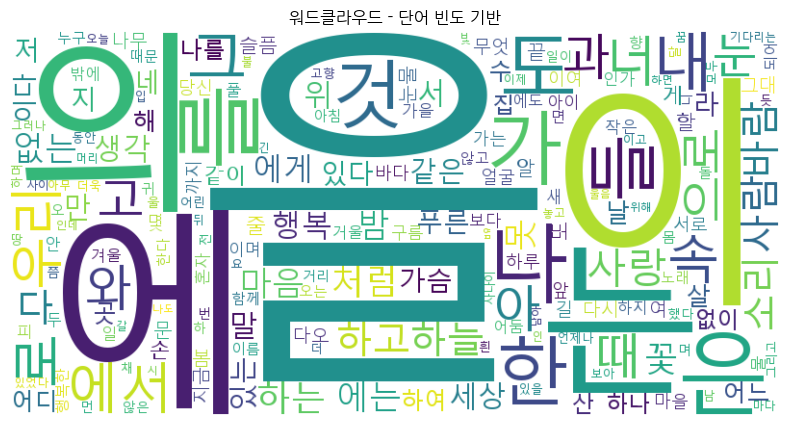

In [ ]:
# 워드 클라우드 생성
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import koreanize_matplotlib

# 1. 텍스트 파일 불러오기
poetry_txt = './poetry2.txt'

try:
    with open(poetry_txt, 'r', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print(f"파일 '{poetry_txt}'을 찾을 수 없습니다.")
    exit()

# 2. 특수문자 제거 및 줄바꿈 처리
lines = [re.sub(r'[^\w가-힣\s]', '', line.strip()) for line in text.split('\n') if line.strip()]

# 3. 반복 문자 정규화
lines = [re.sub(r'(.)\1+', r'\1', line) for line in lines]

# 4. 형태소 분석 (KoNLPy 사용)
okt = Okt()
tokens = []
for line in lines:
    tokens.extend(okt.morphs(line))  # 형태소 단위 분리

# 5. 단어 빈도수 계산
word_counts = Counter(tokens)

# 6. 워드클라우드 생성 및 출력
wordcloud = WordCloud(font_path='malgun.ttf',  # 한글 폰트 설정
                      width=800, height=400, 
                      background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("워드클라우드 - 단어 빈도 기반")
plt.show()

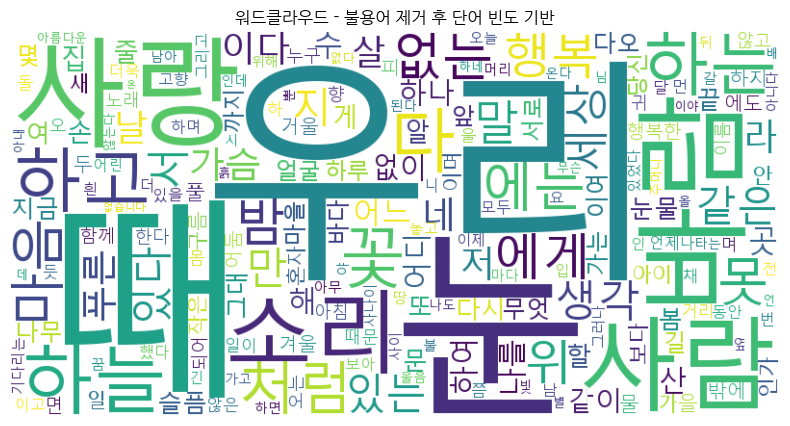

In [ ]:
# 불용어 제거 워드 클라우드
stopwords = {'은', '는', '이', '가', '을', '를', '에', '에서', '의', '도', '로', '과', '와', '한', '하다', '나', '것', '들', '내','그','너','으로', '아','고','속'}
filtered_tokens = [word for word in tokens if word not in stopwords]  # 불용어 제외

# 단어 빈도수 계산
word_counts = Counter(filtered_tokens)

# 워드클라우드 생성 및 출력
wordcloud = WordCloud(font_path='malgun.ttf',  # 한글 폰트 설정
                      width=800, height=400, 
                      background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("워드클라우드 - 불용어 제거 후 단어 빈도 기반")
plt.show()

Epoch 1, Train Loss: 7.6351, Test Loss: 193.9191
Train Accuracy: 0.9905, Test Accuracy: 0.0683
모델 성능이 향상되어 저장되었습니다!
Epoch 2, Train Loss: 6.5904, Test Loss: 194.6189
Train Accuracy: 0.9905, Test Accuracy: 0.0679
Epoch 3, Train Loss: 5.7765, Test Loss: 195.3388
Train Accuracy: 0.9905, Test Accuracy: 0.0679
Epoch 4, Train Loss: 5.1438, Test Loss: 196.0628
Train Accuracy: 0.9905, Test Accuracy: 0.0668
Epoch 5, Train Loss: 4.6392, Test Loss: 196.7654
Train Accuracy: 0.9906, Test Accuracy: 0.0664
Epoch 6, Train Loss: 4.2338, Test Loss: 197.4207
Train Accuracy: 0.9906, Test Accuracy: 0.0664
Epoch 7, Train Loss: 3.8984, Test Loss: 198.0372
Train Accuracy: 0.9908, Test Accuracy: 0.0664
Epoch 8, Train Loss: 3.6260, Test Loss: 198.6076
Train Accuracy: 0.9908, Test Accuracy: 0.0660
Epoch 9, Train Loss: 3.3914, Test Loss: 199.1723
Train Accuracy: 0.9908, Test Accuracy: 0.0664
Epoch 10, Train Loss: 3.1963, Test Loss: 199.6963
Train Accuracy: 0.9908, Test Accuracy: 0.0668
Epoch 11, Train Loss: 3.0135

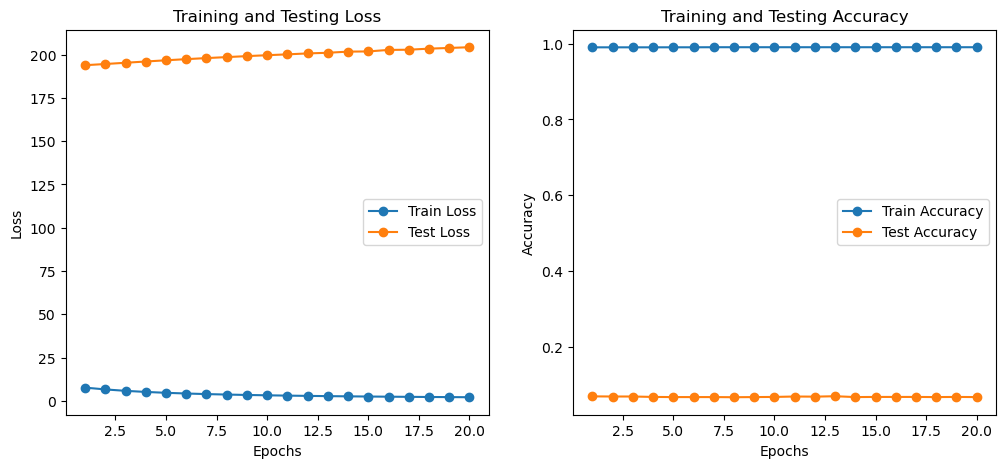

In [10]:
import matplotlib.pyplot as plt

# 학습 과정에서 손실과 정확도를 저장할 리스트
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 20
batch_size = 128
best_accuracy = 0.0  # 최고 정확도 추적

for epoch in range(epochs):
    # 학습 단계
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = len(y_train)

    for i in range(0, len(X_train), batch_size):
        x_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        optimizer.zero_grad()
        output = model(x_batch)
        train_loss = criterion(output, y_batch)
        train_loss.backward()
        optimizer.step()

        total_train_loss += train_loss.item()
        _, predicted = torch.max(output, dim=1)
        correct_train += (predicted == y_batch).sum().item()

    # 평가 단계
    model.eval()
    with torch.no_grad():
        total_test_loss = 0
        correct_test = 0
        total_test = len(y_test)

        for i in range(0, len(X_test), batch_size):
            x_batch = X_test[i:i+batch_size]
            y_batch = y_test[i:i+batch_size]
            output = model(x_batch)
            test_loss = criterion(output, y_batch).item()
            _, predicted = torch.max(output, dim=1)
            correct_test += (predicted == y_batch).sum().item()
            total_test_loss += test_loss

        train_accuracy = correct_train / total_train
        test_accuracy = correct_test / total_test

        # 결과 저장
        train_losses.append(total_train_loss)
        test_losses.append(total_test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}, Train Loss: {total_train_loss:.4f}, Test Loss: {total_test_loss:.4f}")
        print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # 정확도가 향상된 경우 모델 저장
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            torch.save(model.state_dict(), "best_model.pth")
            print("모델 성능이 향상되어 저장되었습니다!")

# 손실 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, epochs+1), test_losses, label="Test Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Testing Loss")

# 정확도 그래프 출력
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, epochs+1), test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy")

plt.show()

In [ ]:
def load_model(model_path, vocab_size, embed_dim=128, hidden_dim=256):
    """
    저장된 모델을 불러옵니다.
    :param model_path: 저장된 모델 파일 경로
    :param vocab_size: 단어 집합 크기
    :param embed_dim: 임베딩 차원
    :param hidden_dim: LSTM 숨겨진 상태 크기
    :return: 모델 객체
    """
    model = LSTMModel(vocab_size=vocab_size, embed_dim=embed_dim, hidden_dim=hidden_dim)
    model.load_state_dict(torch.load(model_path))  # 저장된 가중치 로드
    model.eval()  # 평가 모드로 전환
    return model


def generate_poem(model, start_word, num_words=20, line_length=5):
    """
    저장된 모델을 사용하여 시를 생성합니다.
    :param model: 학습된 모델 객체
    :param start_word: 시작 단어
    :param num_words: 생성할 단어 수
    :param line_length: 한 줄에 포함될 단어 개수
    :return: 생성된 시 텍스트
    """
    words = [start_word]
    input_seq = [word2idx.get(start_word, 0)]  # 시작 단어의 인덱스 가져오기

    for _ in range(num_words):
        # 입력 데이터 준비
        input_tensor = torch.tensor([input_seq[-seq_length:]], dtype=torch.long)
        
        with torch.no_grad():
            # 모델 출력 가져오기
            output = model(input_tensor)
            predicted_idx = torch.argmax(output, dim=1).item()  # 가장 높은 확률의 단어 선택
            
            # 예측된 단어 가져오기
            predicted_word = idx2word.get(predicted_idx, '<unk>')  # 모르는 단어는 <unk>로 처리
            words.append(predicted_word)
            input_seq.append(predicted_idx)

    # 단어들을 줄바꿈 형식으로 변환
    lines = [' '.join(words[i:i + line_length]) for i in range(0, len(words), line_length)]
    return '\n'.join(lines)  # 줄 바꿈을 추가하여 시 형태로 반환
# 저장된 모델 파일 경로
model_path = "best_model.pth"

# 모델 로드
loaded_model = load_model(model_path, vocab_size)

# 시작 단어와 예측할 단어 수
start_word = '행복'  # 시작 단어
num_words = 30       # 예측할 단어 수

# 시 생성
generated_poem = generate_poem(loaded_model, start_word, num_words)
print("생성된 시!")
print(generated_poem)

생성된 시!
행복 은 우리 곁 에
살랑대고 있다 행복 은 어제
나 오늘이 나 우리 주변
를 마시며 과 아르바이트 를
기다리는 으로 나를 밀어 올려
이 울렁이는 가슴 을 열고
들어오는
